<a href="https://colab.research.google.com/github/shoaibahmad0/Intro-to-Data_Science/blob/main/kidney_disease_classificaton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the libraries

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.io import imread
import cv2
sns.set()

# Creating the training set

In [4]:
from pathlib import Path
import os

# Step 2: Define the path correctly to the dataset in your Drive
data_dir = Path('/content/drive/MyDrive/DataSets')

# Check the directory structure
print("Dataset Directory:", data_dir)
print("Subdirectories:", os.listdir(data_dir))


Dataset Directory: /content/drive/MyDrive/DataSets
Subdirectories: ['Tumor', 'Cyst', 'Stone', 'Normal', '.ipynb_checkpoints', 'CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone', 'train', 'val', 'test']


In [5]:
# Print files in each subdirectory to make sure images are present
Normal_Cases_dir = data_dir / 'Normal'
Cyst_Cases_dir = data_dir / 'Cyst'
Stone_Cases_dir = data_dir / 'Stone'
Tumor_Cases_dir = data_dir / 'Tumor'

print("Normal Folder:", os.listdir(Normal_Cases_dir))
print("Cyst Folder:", os.listdir(Cyst_Cases_dir))
print("Stone Folder:", os.listdir(Stone_Cases_dir))
print("Tumor Folder:", os.listdir(Tumor_Cases_dir))


Normal Folder: ['Normal- (4671).jpg', 'Normal- (4665).jpg', 'Normal- (4668).jpg', 'Normal- (4667).jpg', 'Normal- (4658).jpg', 'Normal- (4675).jpg', 'Normal- (4672).jpg', 'Normal- (4673).jpg', 'Normal- (4666).jpg', 'Normal- (467).jpg', 'Normal- (4693).jpg', 'Normal- (4686).jpg', 'Normal- (4692).jpg', 'Normal- (4684).jpg', 'Normal- (4687).jpg', 'Normal- (4683).jpg', 'Normal- (4700).jpg', 'Normal- (4701).jpg', 'Normal- (4702).jpg', 'Normal- (4688).jpg', 'Normal- (4685).jpg', 'Normal- (470).jpg', 'Normal- (4694).jpg', 'Normal- (4689).jpg', 'Normal- (4679).jpg', 'Normal- (468).jpg', 'Normal- (4698).jpg', 'Normal- (4691).jpg', 'Normal- (47).jpg', 'Normal- (469).jpg', 'Normal- (4703).jpg', 'Normal- (4696).jpg', 'Normal- (4682).jpg', 'Normal- (4697).jpg', 'Normal- (4690).jpg', 'Normal- (4678).jpg', 'Normal- (4699).jpg', 'Normal- (4680).jpg', 'Normal- (4681).jpg', 'Normal- (4695).jpg', 'Normal- (4704).jpg', 'Normal- (4717).jpg', 'Normal- (4712).jpg', 'Normal- (4728).jpg', 'Normal- (4720).jpg', 

In [6]:
# Now loading images using Path.glob
Normal_Cases = list(Normal_Cases_dir.glob('*.jpg'))
Cyst_Cases = list(Cyst_Cases_dir.glob('*.jpg'))
Stone_Cases = list(Stone_Cases_dir.glob('*.jpg'))
Tumor_Cases = list(Tumor_Cases_dir.glob('*.jpg'))

# Print to check if images were loaded
print("Normal Cases:", Normal_Cases)
print("Cyst Cases:", Cyst_Cases)
print("Stone Cases:", Stone_Cases)
print("Tumor Cases:", Tumor_Cases)


Normal Cases: [PosixPath('/content/drive/MyDrive/DataSets/Normal/Normal- (4671).jpg'), PosixPath('/content/drive/MyDrive/DataSets/Normal/Normal- (4665).jpg'), PosixPath('/content/drive/MyDrive/DataSets/Normal/Normal- (4668).jpg'), PosixPath('/content/drive/MyDrive/DataSets/Normal/Normal- (4667).jpg'), PosixPath('/content/drive/MyDrive/DataSets/Normal/Normal- (4658).jpg'), PosixPath('/content/drive/MyDrive/DataSets/Normal/Normal- (4675).jpg'), PosixPath('/content/drive/MyDrive/DataSets/Normal/Normal- (4672).jpg'), PosixPath('/content/drive/MyDrive/DataSets/Normal/Normal- (4673).jpg'), PosixPath('/content/drive/MyDrive/DataSets/Normal/Normal- (4666).jpg'), PosixPath('/content/drive/MyDrive/DataSets/Normal/Normal- (467).jpg'), PosixPath('/content/drive/MyDrive/DataSets/Normal/Normal- (4693).jpg'), PosixPath('/content/drive/MyDrive/DataSets/Normal/Normal- (4686).jpg'), PosixPath('/content/drive/MyDrive/DataSets/Normal/Normal- (4692).jpg'), PosixPath('/content/drive/MyDrive/DataSets/Normal/

In [7]:
# Checking the number of images in the Normal directory
print(f"Number of Normal images: {len(Normal_Cases)}")
print(f"Number of Cyst images: {len(Cyst_Cases)}")
print(f"Number of Stone images: {len(Stone_Cases)}")
print(f"number of Tumor images: {len(Tumor_Cases)}")

Number of Normal images: 5077
Number of Cyst images: 3709
Number of Stone images: 1377
number of Tumor images: 2313


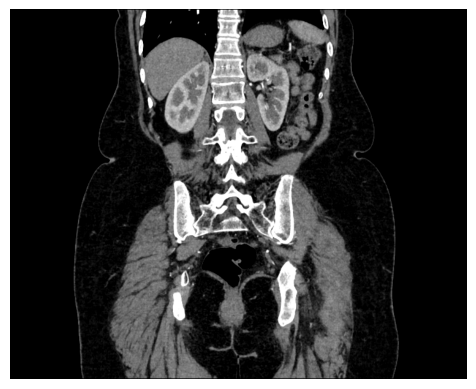

In [8]:
import matplotlib.pyplot as plt
import cv2

# Load the first image to visualize
image_path = Normal_Cases[0]
image = cv2.imread(str(image_path))

# Convert from BGR (OpenCV default) to RGB for correct display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image_rgb)
plt.axis('off')  # Hide axes
plt.show()


In [9]:
from pathlib import Path

# Define the paths for train, val, and test directories
train_dir = data_dir / 'train'
val_dir = data_dir / 'val'
test_dir = data_dir / 'test'

# Create the directories if they don't exist
train_dir.mkdir(parents=True, exist_ok=True)
val_dir.mkdir(parents=True, exist_ok=True)
test_dir.mkdir(parents=True, exist_ok=True)

print(f"Created directories: {train_dir}, {val_dir}, {test_dir}")


Created directories: /content/drive/MyDrive/DataSets/train, /content/drive/MyDrive/DataSets/val, /content/drive/MyDrive/DataSets/test


In [10]:
# Create subdirectories for each class
for category in ['Normal', 'Cyst', 'Stone', 'Tumor']:
    (train_dir / category).mkdir(parents=True, exist_ok=True)
    (val_dir / category).mkdir(parents=True, exist_ok=True)
    (test_dir / category).mkdir(parents=True, exist_ok=True)

print("Created class subdirectories for train, val, and test sets.")





Created class subdirectories for train, val, and test sets.


In [11]:
from sklearn.model_selection import train_test_split

# Get the paths for each category
Normal_Cases = list((data_dir / 'Normal').glob('*.jpg'))
Cyst_Cases = list((data_dir / 'Cyst').glob('*.jpg'))
Stone_Cases = list((data_dir / 'Stone').glob('*.jpg'))
Tumor_Cases = list((data_dir / 'Tumor').glob('*.jpg'))

# Combine all image paths and corresponding labels
all_images = Normal_Cases + Cyst_Cases + Stone_Cases + Tumor_Cases
labels = [0] * len(Normal_Cases) + [1] * len(Cyst_Cases) + [2] * len(Stone_Cases) + [3] * len(Tumor_Cases)

# Split into train (80%), validation (10%), and test (10%)
X_train, X_temp, y_train, y_temp = train_test_split(all_images, labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Train size: {len(X_train)}, Validation size: {len(X_val)}, Test size: {len(X_test)}")


Train size: 9980, Validation size: 1248, Test size: 1248


In [12]:
# Initialize an empty list for train data
train_data = []

# Labeling the Cyst case as 0
for img in Cyst_Cases:
    train_data.append((img, 0))

# Labeling the Normal case as 1
for img in Normal_Cases:
    train_data.append((img, 1))

# Labeling the Stone case as 2
for img in Stone_Cases:
    train_data.append((img, 2))

# Labeling the Tumor case as 3
for img in Tumor_Cases:
    train_data.append((img, 3))

# Convert the list of tuples to a pandas dataframe
train_data = pd.DataFrame(train_data, columns=['image', 'label'])

# Shuffle the data randomly
train_data = train_data.sample(frac=1.).reset_index(drop=True)

# Show the first few rows of the dataframe to verify
print(train_data.head())

# Verify unique labels
print(train_data['label'].unique())


                                               image  label
0  /content/drive/MyDrive/DataSets/Normal/Normal-...      1
1  /content/drive/MyDrive/DataSets/Cyst/Cyst- (99...      0
2  /content/drive/MyDrive/DataSets/Normal/Normal-...      1
3  /content/drive/MyDrive/DataSets/Stone/Stone- (...      2
4  /content/drive/MyDrive/DataSets/Normal/Normal-...      1
[1 0 2 3]


In [13]:
# Returns all the unique values of 'label' in train_data
unique_labels = train_data['label'].unique()

# Display the unique labels
print(unique_labels)


[1 0 2 3]


In [14]:
# Returns number of rows and columns
train_data.shape

(12476, 2)

# Plotting dataset classes

In [15]:
# Getting the count of each class (Normal, Cyst, Tumor, Stone)
cases_count = train_data['label'].value_counts()
cases_count

,count
label,
1,5077
0,3709
3,2313
2,1377


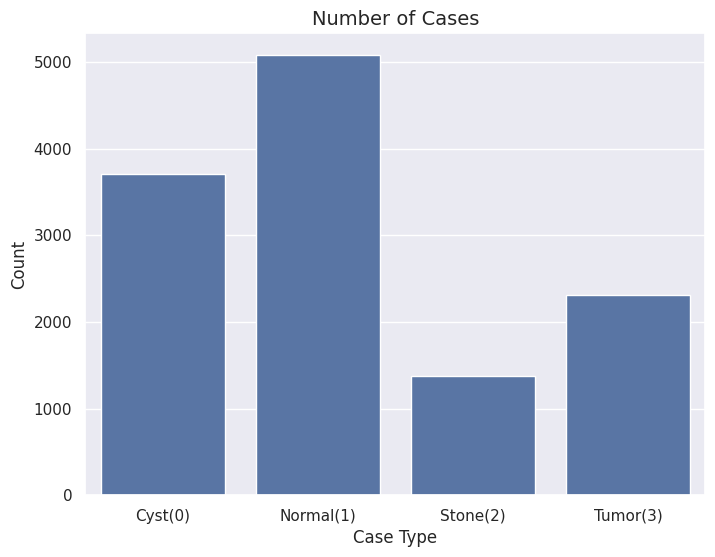

In [16]:
# Plotting the Graph
plt.figure(figsize = (8,6))  # Size of graph
sns.barplot(x = cases_count.index, y = cases_count.values)
plt.title('Number of Cases', fontsize=14)
plt.xlabel('Case Type', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.xticks(range(len(cases_count.index)),['Cyst(0)', 'Normal(1)','Stone(2)','Tumor(3)'])
plt.show()

# CT Scanned

In [17]:
# Getting few samples for both the classes

# Gets 5 data from each cases
Cyst_Samples = (train_data[train_data['label'] == 0]['image'].iloc[:5]).tolist()
Normal_Samples = (train_data[train_data['label'] == 1]['image'].iloc[:5]).tolist()
Stone_Samples = (train_data[train_data['label'] == 2]['image'].iloc[:5]).tolist()
Tumor_Samples = (train_data[train_data['label'] == 3]['image'].iloc[:5]).tolist()

# Combining data in one variable
samples = Cyst_Samples + Normal_Samples + Stone_Samples + Tumor_Samples

del Cyst_Samples, Normal_Samples, Stone_Samples, Tumor_Samples

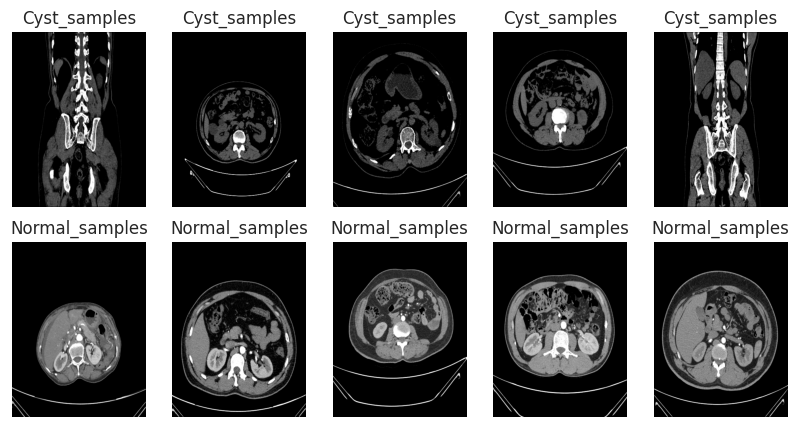

In [18]:
# Displaying the picture
f, ax = plt.subplots(2, 5,figsize=(10,5)) # Initilizing the graph where image is to be display

for i in range(10):
    img = imread(samples[i]) # reading the image
    ax[i//5, i%5].imshow(img, cmap='gray') # displaying the image

    # putting title in the images
    if i<5:
        ax[i//5, i%5].set_title("Cyst_samples")
    elif i<10:
        ax[i//5, i%5].set_title("Normal_samples")
    elif i<15:
        ax[i//5, i%5].set_title("Stone_samples")
    elif i<20:
        ax[i//5, i%5].set_title("Tumor_samples")

    # removing the scales in the graph
    ax[i//5, i%5].axis('off')
    ax[i//5, i%5].set_aspect('auto')

plt.show()


In [19]:
# Get the path
Normal_Cases_dir = train_dir / 'Normal'
Cyst_Cases_dir = train_dir / 'Cyst'
Stone_Cases_dir = train_dir / 'Stone'
Tumor_Cases_dir = train_dir / 'Tumor'

In [20]:
# Getting the list of all the images
Normal_Cases = Normal_Cases_dir.glob('*.jpg')
Cyst_Cases = Cyst_Cases_dir.glob('*.jpg')
Stone_Cases = Stone_Cases_dir.glob('*.jpg')
Tumor_Cases = Tumor_Cases_dir.glob('*.jpg')
train_data = []
train_labels = []

# Data Preprocessing

In [21]:
for img in Cyst_Cases:
    img = cv2.imread(str(img)) # Loading image
    img = cv2.resize(img, (28,28)) # resizing image
    if img.shape[2] == 1: # Number of channel in the dimension.
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) # Changing image color
    img = np.array(img) # creating a numpy array
    img = img/255  # Normalization
    label = 'Cyst'
    train_data.append(img)
    train_labels.append(label)

In [22]:
for img in Normal_Cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img,(28,28))
    if img.shape[2] == 1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = np.array(img)
    img = img/255
    label = 'Normal'
    train_data.append(img)
    train_labels.append(label)

In [23]:
for img in Stone_Cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (28,28))
    if img.shape[2] == 1:
        img = np.dstack([img,img,img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = np.array(img)
    img = img/255
    label = "Stone"
    train_data.append(img)
    train_labels.append(label)

In [24]:
for img in Tumor_Cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (28,28))
    if img.shape[2] == 1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = np.array(img)
    img = img/255
    label = "Tumor"
    train_data.append(img)
    train_labels.append(label)

In [25]:
train_data1 = np.array(train_data) # train_data or train_data1 is a 4D array from 3D image Array
train_labels1 = np.array(train_labels)
print('Total number of validation example: ', train_data1.shape)
print('Total number of Labels : ', train_labels1.shape)

Total number of validation example:  (9980, 28, 28, 3)
Total number of Labels :  (9980,)


In [26]:
train_data1[1]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [27]:
train_labels1 = pd.DataFrame(train_labels1, columns = ['label'],index=None)
train_labels1

,label
0,Cyst
1,Cyst
2,Cyst
3,Cyst
4,Cyst
...,...
9975,Tumor
9976,Tumor
9977,Tumor
9978,Tumor


In [28]:
train_labels1['label'].unique()


array(['Cyst', 'Normal', 'Stone', 'Tumor'], dtype=object)

In [29]:
train_labels1['label'] = train_labels1['label'].map({'Cyst':0,'Normal':1,'Stone':2,'Tumor':3})

In [30]:
print(train_data1.shape)
print(train_labels1.shape)

(9980, 28, 28, 3)
(9980, 1)


In [31]:
train_labels1.isnull().sum() # Checking for the missing(NULL) value in the labels1

,0
label,0


# Solving Image Dataset Imblance Using SMOTE

In [33]:
from imblearn.over_sampling import SMOTE
smote = SMOTE() # Initilizing The SMOTE class
train_rows = len(train_data1) # getting total number or rows
train_data1 = train_data1.reshape(train_rows,-1)  # Converting 4D array to 2D Array
train_data2, train_labels2 = smote.fit_resample(train_data1,train_labels1) # Balancing Image Dataset using SMOTE

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


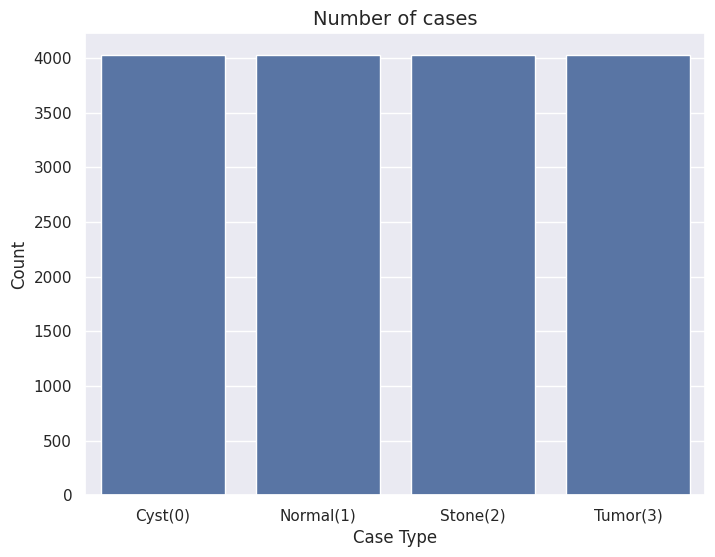

In [35]:
cases_count1 = train_labels2['label'].value_counts() # Counting values of diffrent image

#Plotting Graph for Label values
plt.figure(figsize=(8,6)) # Setting size of graph
sns.barplot(x=cases_count1.index, y=cases_count1.values)
plt.title('Number of cases', fontsize = 14)
plt.xlabel('Case Type',fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.xticks(range(len(cases_count1.index)), ['Cyst(0)', 'Normal(1)', 'Stone(2)', 'Tumor(3)'])
plt.show()

In [36]:
train_data2.shape


(16100, 2352)

In [37]:
train_data2 = train_data2.reshape(-1,28,28,3) # Converting 2D array to 4D Array
train_data2.shape

(16100, 28, 28, 3)

In [38]:
train_data2[0]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

# Splitting the Dataset For training and testing and Validating using sklearn : train_test_split

In [40]:
"""from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_data2, train_labels2, test_size = 0.20,random_state = 42) # With random_state=42, we get the same train and test sets across different executions
X_train, X_val, y_train, y_val = train_test_split(train_data2, train_labels2, test_size = 0.10,random_state = 42)"""




# First split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(train_data2, train_labels2, test_size=0.20, random_state=42)

# Further split the training set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=42)


In [42]:
print("Training Data X : ",X_train.shape)
print("Testing Data X : ",X_test.shape)
print("Training Data y : ",y_train.shape)
print("Testing Data y : ",y_test.shape)
print("Validating Data X : ",X_val.shape)
print("Validating Data y",y_val.shape)
print("Image Size : ",X_train[0].shape)

Training Data X :  (11592, 28, 28, 3)
Testing Data X :  (3220, 28, 28, 3)
Training Data y :  (11592, 1)
Testing Data y :  (3220, 1)
Validating Data X :  (1288, 28, 28, 3)
Validating Data y (1288, 1)
Image Size :  (28, 28, 3)


# Data Augmentation

In [43]:
import tensorflow as tf

In [44]:
data_augmentation = tf.keras.preprocessing.image.ImageDataGenerator(
                    rotation_range=30,
                    horizontal_flip=True)

# CNN

In [45]:
from tensorflow.keras import layers,models

In [47]:
model = models.Sequential([
        layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 3)) ,
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
#         layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten()

])
model.add(layers.Dense(4,activation='softmax'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 28)          │             784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 28)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          16,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           6,404 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,380 (91.33 KB)

 Trainable params: 23,380 (91.33 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9980 - loss: 0.0048 - val_accuracy: 1.0000 - val_loss: 3.0749e-04
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 1.0000 - loss: 7.3407e-05 - val_accuracy: 1.0000 - val_loss: 1.7749e-04
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 1.0000 - loss: 5.1148e-05 - val_accuracy: 1.0000 - val_loss: 1.3764e-04
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 1.0000 - loss: 4.0367e-05 - val_accuracy: 1.0000 - val_loss: 1.1094e-04
Epoch 5/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 1.0000 - loss: 2.9309e-05 - val_accuracy: 1.0000 - val_loss: 8.7741e-05
Epoch 6/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 1.0000 - loss: 2.6231e-05 - val_accuracy: 1.0000 - val_loss: 6.8129e-05
Epoch 7/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 1.0000 - loss: 2.1109e-05 - val_accuracy: 1.0000 - val_loss: 6.1065e-05
Epoch 8/10
363/363 ━━━━━━━━━━━━━━━━━━━

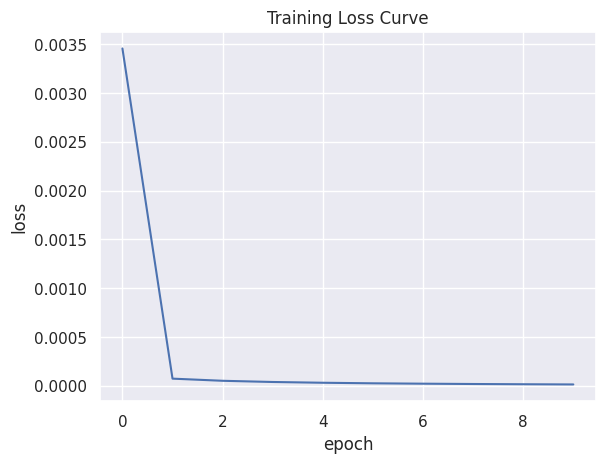

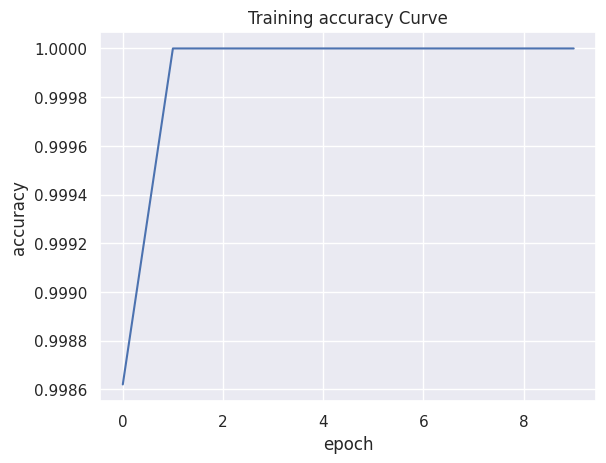

In [49]:
# Traning Model

#Compiling
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Model Fit
history = model.fit(np.array(X_train), np.array(y_train), epochs=10, validation_data=(np.array(X_val), np.array(y_val)))

# Graph for Loss
plt.plot(history.history['loss'])
plt.ylabel("loss")
plt.xlabel("epoch")
plt.title("Training Loss Curve")
plt.show()

# Graph for Accuracy
plt.plot(history.history['accuracy'])
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.title("Training accuracy Curve")
plt.show()

In [52]:
#Predicting Values

a = model.predict(X_test)
print(a)

101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
[[9.99996603e-01 2.13041976e-12 9.94304378e-12 3.34038623e-06]
 [4.71217172e-05 8.36233539e-06 1.90397273e-07 9.99944270e-01]
 [2.17522409e-08 1.69646874e-08 1.87217360e-11 9.99999940e-01]
 ...
 [5.24635352e-15 2.29126249e-06 9.99997735e-01 1.03121248e-10]
 [1.87890965e-08 1.52136272e-06 9.99996543e-01 1.86196030e-06]
 [1.28649754e-05 1.14065815e-08 9.99987125e-01 1.71864717e-10]]


In [53]:
# Sparse to Dense
b = []
for i in a:
    if i[0] > i[1] and i[0] > i[2] and i[0] > i[3]:
        b.append(0)
    elif i[1] > i[0] and i[1] > i[2] and i[1] > i[3]:
        b.append(1)
    elif i[2] > i[1] and i[2] > i[0] and i[2] > i[3]:
        b.append(2)
    else:
        b.append(3)

print(b)

[0, 3, 3, 3, 2, 2, 1, 1, 3, 2, 2, 3, 2, 2, 1, 2, 3, 0, 3, 3, 2, 3, 1, 2, 3, 3, 0, 2, 0, 1, 2, 2, 3, 2, 2, 0, 2, 0, 0, 0, 0, 1, 3, 1, 3, 1, 2, 3, 2, 3, 3, 0, 1, 1, 2, 3, 1, 1, 2, 1, 1, 0, 0, 1, 0, 2, 2, 1, 2, 0, 1, 2, 3, 0, 3, 3, 0, 2, 3, 0, 2, 0, 2, 0, 2, 3, 0, 1, 1, 2, 3, 1, 3, 3, 1, 0, 3, 0, 1, 1, 1, 1, 1, 0, 2, 3, 2, 0, 3, 1, 1, 1, 1, 0, 0, 0, 3, 3, 1, 2, 3, 1, 3, 1, 1, 0, 1, 3, 3, 0, 1, 0, 2, 2, 3, 2, 1, 1, 3, 3, 2, 1, 2, 3, 1, 1, 3, 3, 3, 2, 2, 3, 0, 2, 3, 3, 3, 0, 1, 0, 2, 0, 3, 3, 1, 2, 2, 2, 0, 3, 1, 1, 2, 2, 0, 0, 1, 3, 1, 3, 3, 3, 0, 3, 0, 1, 1, 1, 3, 0, 0, 3, 1, 3, 0, 1, 3, 3, 0, 1, 1, 2, 3, 0, 1, 2, 3, 3, 2, 2, 1, 0, 3, 0, 3, 1, 0, 0, 2, 3, 1, 3, 0, 2, 3, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 1, 2, 0, 1, 0, 1, 2, 2, 0, 2, 1, 0, 1, 0, 0, 0, 3, 2, 2, 1, 2, 1, 1, 2, 0, 1, 3, 1, 0, 1, 3, 0, 3, 1, 0, 0, 0, 2, 3, 0, 3, 1, 3, 1, 2, 1, 3, 1, 1, 2, 1, 0, 3, 0, 0, 0, 1, 1, 0, 3, 1, 2, 2, 1, 1, 1, 3, 3, 2, 2, 3, 3, 2, 0, 2, 3, 2, 2, 1, 0, 2, 3, 1, 1, 1, 3, 0, 2, 2, 3, 3, 1, 

In [54]:
from sklearn.metrics import confusion_matrix,f1_score
from sklearn.metrics import accuracy_score
print("Accuracy Score : ",accuracy_score(y_test,b))
cm = confusion_matrix(y_test, b)
print("\n\nConfusion Matrix : \n\n",cm)

Accuracy Score :  1.0


Confusion Matrix : 

 [[804   0   0   0]
 [  0 813   0   0]
 [  0   0 785   0]
 [  0   0   0 818]]


[Text(0, 0.5, 'Cyst'),
 Text(0, 1.5, 'Normal'),
 Text(0, 2.5, 'Stone'),
 Text(0, 3.5, 'Tumor')]

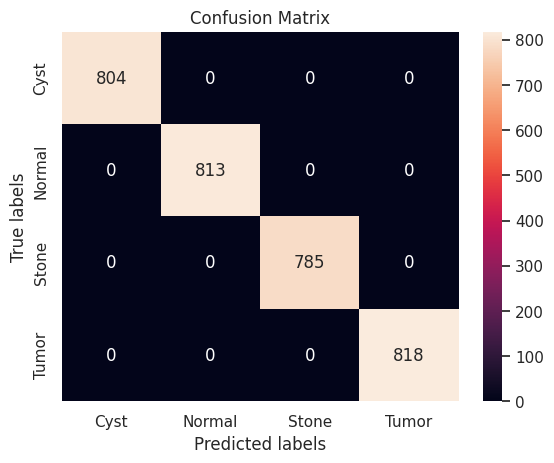

In [55]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Cyst', 'Normal','Stone','Tumor'])
ax.yaxis.set_ticklabels(['Cyst', 'Normal','Stone','Tumor'])

In [56]:
print("F1 Score is :",f1_score(y_test,b,average='micro'))



F1 Score is : 1.0


In [57]:
pic = []
image='CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor/Tumor- (564).jpg'
img = cv2.imread(str(image))

In [58]:
img = cv2.imread(image_path)
if img is None:
    print(f"Error loading image: {image_path}")
else:
    img = cv2.resize(img, (28, 28))
    pic.append(img)


In [59]:
pic = []  # Initialize an empty list for storing image data

# Assuming 'img' is the image after reading and resizing
img = cv2.imread(image_path)
if img is not None:
    img = cv2.resize(img, (28, 28))
    pic.append(img)

# Convert the list of images to a numpy array
pic1 = np.array(pic)

# Now, you can use pic1 for prediction
a = model.predict(pic1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


In [61]:
if a.argmax() == 0 :
    print("The detected disease is \"Cyst\"")
elif a.argmax() == 1 :
    print("Kidney is \"Normal\" ")
elif a.argmax() == 2:
    print("The detected disease is \"Stone\"")
else:
    print("The detected disease is \"Tumor\"")

Kidney is "Normal" 


In [70]:

# Save the model to Google Drive
model.save('/content/drive/MyDrive/model.keras')


In [71]:
from tensorflow.keras.models import load_model

# Assuming `model` is your trained model
model.save('model.h5')


In [72]:
pic1.shape

(1, 28, 28, 3)